## Plotting the circuit to execute the SWAP operation for one or more iteration

We propose the usage of Heisenberg evolution to perform the 2 qubit SWAP gate for duration $\delta t$ using the ZZ gate. By applying two Hadamard gates onto each qubit, we can get the XX gate:
\begin{align}
    &(H \otimes H) e^{-itZ\otimes Z} (H \otimes H) \\
    = &e^{-it(H \otimes H)(Z\otimes Z)(H \otimes H)} = e^{-itX\otimes X}
\end{align}

Similarly, we can achieve the YY gate by applying $S^\dagger$ gate followed by Hadamard gate:
\begin{align}
    & (SH \otimes SH) e^{-itZ\otimes Z}  [(H S^\dagger) \otimes (H S^\dagger)] \\
    = &e^{-it(SH \otimes SH)(Z\otimes Z)[(H S^\dagger) \otimes (H S^\dagger)]} = e^{-itY\otimes Y}
\end{align}

Because ZZ, YY and XX commute, we can achieve the SWAP operation by doing:
\begin{align}
    e^{-itSWAP} &=e^{-it(Z\otimes Z + Y\otimes Y + X\otimes X)}\\
    &= e^{-itZ\otimes Z}e^{-itY\otimes Y}e^{-itX\otimes X}\\
    &= e^{-itZ\otimes Z} (SH \otimes SH) e^{-itZ\otimes Z}
    [(H S^\dagger) \otimes (H S^\dagger)]
    (H \otimes H) e^{-itZ\otimes Z} (H \otimes H) \\
    &= e^{-itZ\otimes Z} (SH \otimes SH) e^{-itZ\otimes Z}
    [(HS^\dagger H) \otimes (HS^\dagger H)] e^{-itZ\otimes Z} (H \otimes H)
\end{align}

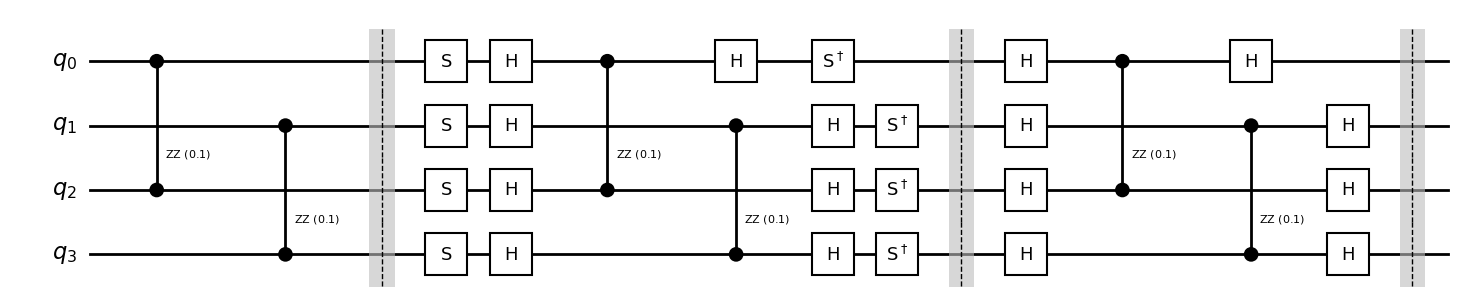

In [35]:
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister
from qiskit.circuit.library import RZZGate

# Create a quantum circuit with two qubits
qc = QuantumCircuit(4)

delta = 0.1  # Angle in radians

for i in range(2):
    # ZZ
    qc.append(RZZGate(delta), [i, i+2])
qc.barrier()
for i in range(2):
    # YY
    qc.s(i)
    qc.s(i+2)
    qc.h(i)
    qc.h(i+2)
    qc.append(RZZGate(delta), [i, i+2])
    qc.h(i)
    qc.h(i+2)
    qc.sdg(i)
    qc.sdg(i+2)
qc.barrier()
for i in range(2):
    # XX
    qc.h(i)
    qc.h(i+2)
    qc.append(RZZGate(delta), [i, i+2])
    qc.h(i)
    qc.h(i+2)
qc.barrier()

# Draw the circuit
qc.draw(output='mpl',style="bw")


Here we draw an example circuit with 4 qubits - 1 work qubit and 3 memory qubits. 
Change `num_qubits` to change the total number of qubits.

In [32]:
# Create a quantum circuit with two qubits
num_qubits = 6
work_reg = QuantumRegister(2, name='\sigma')

mem_reg_1 = QuantumRegister(2, name='\\rho1')
mem_reg_2 = QuantumRegister(2, name='\\rho2')
###add other registers here### 
qc = QuantumCircuit(work_reg,mem_reg_1,mem_reg_2)



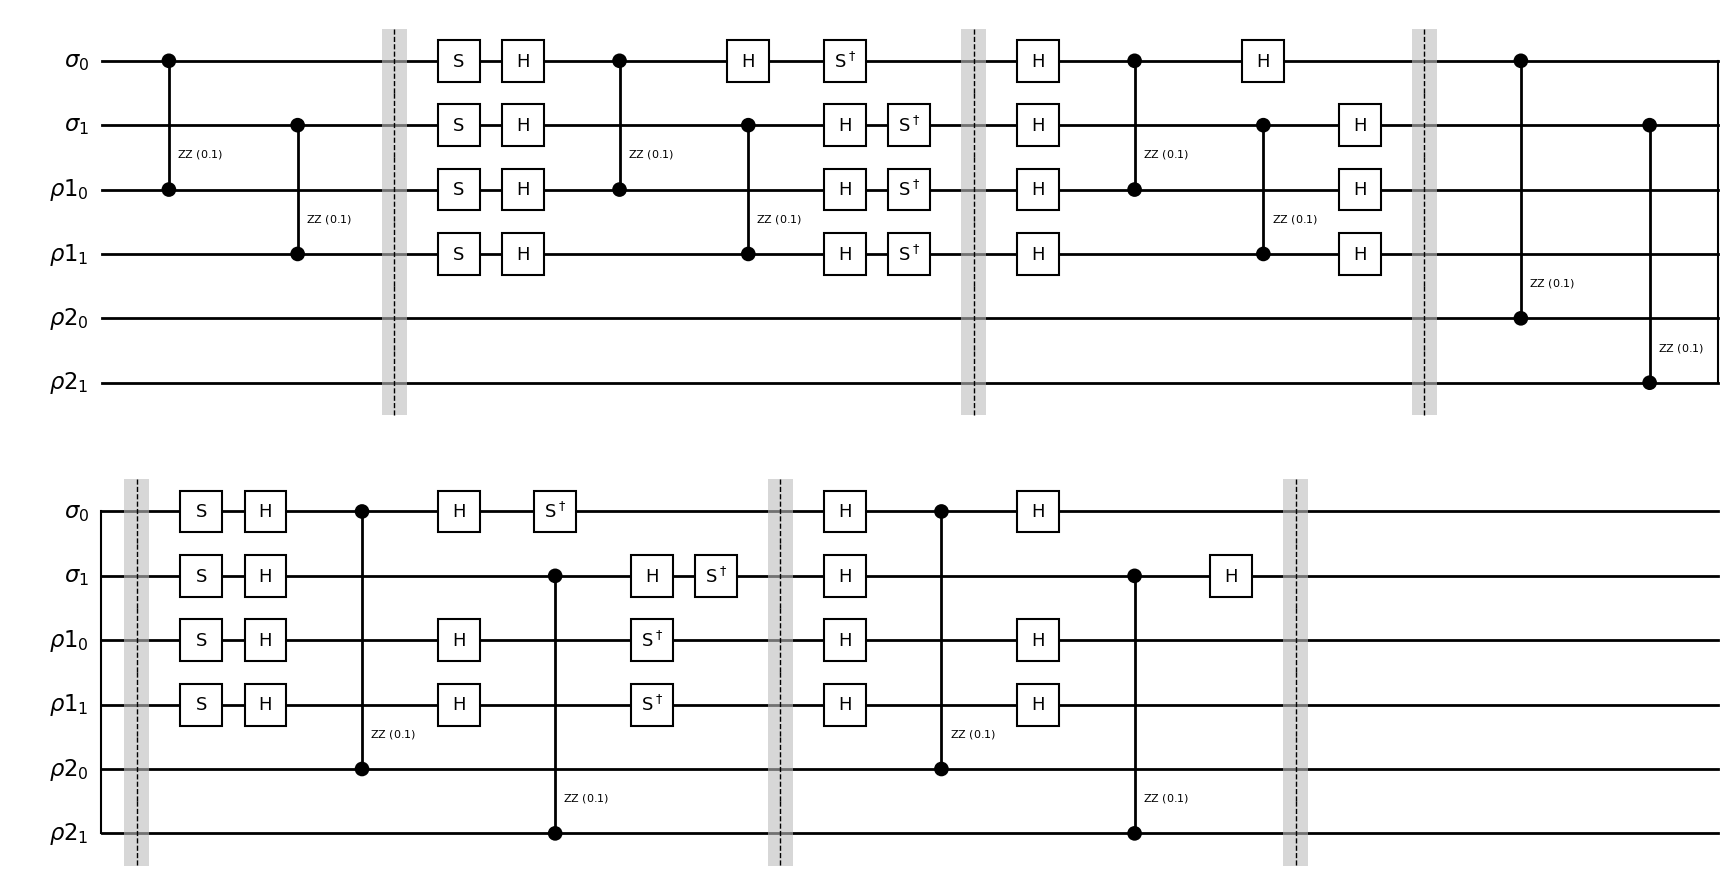

In [33]:

delta = 0.1  # Angle in radians

for memory_qubit in range(2,num_qubits,2):
    for i in range(2):
        # ZZ
        qc.append(RZZGate(delta), [i, memory_qubit+i])
    qc.barrier()
    for i in range(2):
        # YY
        qc.s(i)
        qc.s(i+2)
        qc.h(i)
        qc.h(i+2)
        qc.append(RZZGate(delta), [i, memory_qubit+i])
        qc.h(i)
        qc.h(i+2)
        qc.sdg(i)
        qc.sdg(i+2)
    qc.barrier()
    for i in range(2):
        # XX
        qc.h(i)
        qc.h(i+2)
        qc.append(RZZGate(delta), [i, memory_qubit+i])
        qc.h(i)
        qc.h(i+2)
    qc.barrier()
    # if memory_qubit<num_qubits-1:
    #     qc.barrier()


# Draw the circuit
qc.draw(output='mpl',style="bw")